## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.75, 0.55, 0.35, 0.15]
NESTEROV = [True, False]

In [7]:
results = {}
"""
Build the experiment loop
"""
for mom in MOMENTUM:
    for nes in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.6f" % (mom))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nes, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-mom-%s" % str(mom) + " , " + "exp-nes-%s" % str(nes)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 42us/step - loss: 2.2515 - acc: 0.1753 - val_loss: 2.1905 - val_acc: 0.2181
Epoch 2/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1461 - acc: 0.2425 - val_loss: 2.1048 - val_acc: 0.2575
Epoch 3/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.0677 - acc: 0.2782 - val_loss: 2.0353 - val_acc: 0.2877
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.0048 - acc: 0.3005 - val_loss: 1.9793 - val_acc: 0.3075
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9565 - acc: 0.3166 - val_loss: 1.9380 - val_acc: 0.3236
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9197 - acc: 0.3303 - val_loss: 1.9064 - val_acc: 0.3354
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8915 - acc: 0.3384 - val_loss: 1.8819 - val_acc

50000/50000 [==============================] - 2s 38us/step - loss: 2.2809 - acc: 0.1406 - val_loss: 2.2642 - val_acc: 0.1630
Epoch 3/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2587 - acc: 0.1726 - val_loss: 2.2442 - val_acc: 0.1873
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2396 - acc: 0.1940 - val_loss: 2.2260 - val_acc: 0.2059
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2208 - acc: 0.2082 - val_loss: 2.2067 - val_acc: 0.2190
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2013 - acc: 0.2213 - val_loss: 2.1874 - val_acc: 0.2304
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1828 - acc: 0.2326 - val_loss: 2.1697 - val_acc: 0.2422
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1657 - acc: 0.2418 - val_loss: 2.1531 - val_acc: 0.2586
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 36us/step - loss: 2.2444 - acc: 0.1863 - val_loss: 2.2331 - val_acc: 0.1991
Epoch 4/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.2223 - acc: 0.2088 - val_loss: 2.2112 - val_acc: 0.2197
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2010 - acc: 0.2273 - val_loss: 2.1905 - val_acc: 0.2303
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1805 - acc: 0.2394 - val_loss: 2.1700 - val_acc: 0.2444
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1606 - acc: 0.2486 - val_loss: 2.1508 - val_acc: 0.2520
Epoch 8/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1421 - acc: 0.2561 - val_loss: 2.1329 - val_acc: 0.2603
Epoch 9/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1247 - acc: 0.2631 - val_loss: 2.1160 - val_acc: 0.2674
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 37us/step - loss: 2.2296 - acc: 0.1825 - val_loss: 2.2202 - val_acc: 0.1817
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2101 - acc: 0.1922 - val_loss: 2.2023 - val_acc: 0.1933
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1933 - acc: 0.2030 - val_loss: 2.1866 - val_acc: 0.2047
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1782 - acc: 0.2122 - val_loss: 2.1724 - val_acc: 0.2116
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1644 - acc: 0.2204 - val_loss: 2.1592 - val_acc: 0.2195
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1514 - acc: 0.2272 - val_loss: 2.1466 - val_acc: 0.2291
Epoch 10/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1391 - acc: 0.2361 - val_loss: 2.1347 - val_acc: 0.2350
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 2s 37us/step - loss: 2.2112 - acc: 0.2046 - val_loss: 2.2022 - val_acc: 0.2140
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1942 - acc: 0.2156 - val_loss: 2.1860 - val_acc: 0.2223
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1791 - acc: 0.2258 - val_loss: 2.1715 - val_acc: 0.2299
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1654 - acc: 0.2324 - val_loss: 2.1582 - val_acc: 0.2366
Epoch 9/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1526 - acc: 0.2376 - val_loss: 2.1456 - val_acc: 0.2423
Epoch 10/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1405 - acc: 0.2434 - val_loss: 2.1337 - val_acc: 0.2479
Epoch 11/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1291 - acc: 0.2479 - val_loss: 2.1223 - val_acc: 0.2518
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 2s 38us/step - loss: 2.2131 - acc: 0.1778 - val_loss: 2.2071 - val_acc: 0.1798
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2001 - acc: 0.1876 - val_loss: 2.1945 - val_acc: 0.1858
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1878 - acc: 0.1957 - val_loss: 2.1827 - val_acc: 0.1943
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1763 - acc: 0.2035 - val_loss: 2.1716 - val_acc: 0.2024
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1655 - acc: 0.2101 - val_loss: 2.1612 - val_acc: 0.2105
Epoch 11/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1554 - acc: 0.2165 - val_loss: 2.1514 - val_acc: 0.2185
Epoch 12/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1459 - acc: 0.2221 - val_loss: 2.1423 - val_acc: 0.2244
Epoch 13/50
50000/50000 [========================

50000/50000 [==============================] - 2s 37us/step - loss: 2.2246 - acc: 0.1933 - val_loss: 2.2185 - val_acc: 0.1984
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2109 - acc: 0.2021 - val_loss: 2.2051 - val_acc: 0.2060
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1981 - acc: 0.2104 - val_loss: 2.1928 - val_acc: 0.2132
Epoch 10/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1864 - acc: 0.2202 - val_loss: 2.1816 - val_acc: 0.2183
Epoch 11/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1756 - acc: 0.2232 - val_loss: 2.1711 - val_acc: 0.2260
Epoch 12/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1655 - acc: 0.2301 - val_loss: 2.1612 - val_acc: 0.2321
Epoch 13/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1559 - acc: 0.2348 - val_loss: 2.1518 - val_acc: 0.2369
Epoch 14/50
50000/50000 [=======================

50000/50000 [==============================] - 2s 38us/step - loss: 2.2159 - acc: 0.1914 - val_loss: 2.2107 - val_acc: 0.1969
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2059 - acc: 0.1997 - val_loss: 2.2007 - val_acc: 0.2048
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1963 - acc: 0.2065 - val_loss: 2.1912 - val_acc: 0.2117
Epoch 11/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1872 - acc: 0.2111 - val_loss: 2.1822 - val_acc: 0.2206
Epoch 12/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1785 - acc: 0.2159 - val_loss: 2.1736 - val_acc: 0.2245
Epoch 13/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1702 - acc: 0.2213 - val_loss: 2.1654 - val_acc: 0.2287
Epoch 14/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1623 - acc: 0.2258 - val_loss: 2.1576 - val_acc: 0.2329
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 2s 36us/step - loss: 2.1919 - acc: 0.2128 - val_loss: 2.1859 - val_acc: 0.2185
Epoch 10/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1820 - acc: 0.2184 - val_loss: 2.1763 - val_acc: 0.2212
Epoch 11/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1726 - acc: 0.2231 - val_loss: 2.1672 - val_acc: 0.2260
Epoch 12/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1636 - acc: 0.2272 - val_loss: 2.1585 - val_acc: 0.2309
Epoch 13/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1550 - acc: 0.2309 - val_loss: 2.1503 - val_acc: 0.2331
Epoch 14/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1469 - acc: 0.2333 - val_loss: 2.1425 - val_acc: 0.2357
Epoch 15/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.1392 - acc: 0.2363 - val_loss: 2.1351 - val_acc: 0.2382
Epoch 16/50
50000/50000 [=====================

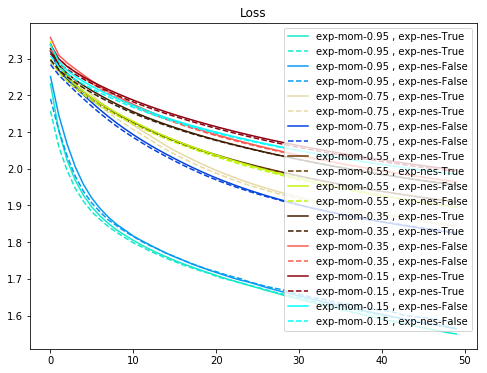

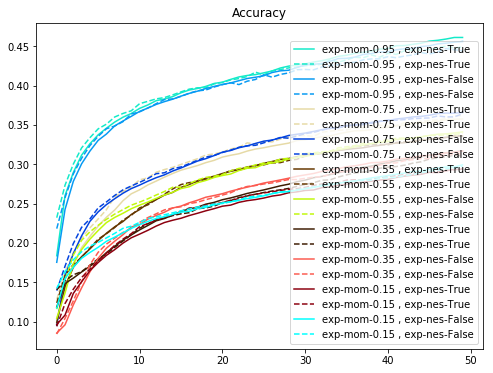

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Draw the results
"""
#color_bar = ["r", "g", "b", "y", "m", "k"]
color_bar = ["xkcd:aqua", "xkcd:azure", "xkcd:beige", "xkcd:blue", "xkcd:brown", "xkcd:chartreuse", 
             "xkcd:chocolate", "xkcd:coral", "xkcd:crimson", "xkcd:cyan", "xkcd:darkblue", "xkcd:darkgreen", 
             "xkcd:fuchsia", "xkcd:gold", "xkcd:green", "xkcd:gray", "xkcd:indigo", "xkcd:ivory", 
             "xkcd:khaki", "xkcd:lavender", "xkcd:lightblue", "xkcd:lightgreen", "xkcd:lime", "xkcd:orange"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()